In [1]:
# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load libraries, functions, palette, theme

In [132]:
%run _libraries.ipynb

In [136]:
%run _functions.ipynb

# Section I. Overview

## Load Saved Section if exists

## Load Data

In [4]:
data_raw = pd.read_csv('data/powerconsumption.csv')

In [5]:
data_raw.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


#### Transform names

In [6]:
data_raw = data_raw.rename(columns={
    'PowerConsumption_Zone1': 'target1',
    'PowerConsumption_Zone2': 'target2',
    'PowerConsumption_Zone3': 'target3'
})

In [7]:
data_raw.columns = map(str.lower, data_raw.columns)

#### Date to index

In [8]:
data_raw['datetime'] = pd.to_datetime(data_raw['datetime'])

In [9]:
data_raw = data_raw.set_index(data_raw['datetime'], drop=True)

In [10]:
data_raw.index.name = None

In [11]:
data_raw = data_raw.drop(columns='datetime')

#### Check duplicates

In [12]:
data_raw[data_raw.duplicated()]

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target1,target2,target3


## Data Split

In [13]:
data_raw.shape

(52416, 8)

In [14]:
train = data_raw.loc['2017-05': '2017-07'].copy()

In [15]:
valid = data_raw.loc['2017-08'].copy()

In [16]:
test = data_raw.loc['2017-09'].copy()

In [17]:
train.shape

(13248, 8)

In [18]:
valid.shape

(4464, 8)

In [19]:
test.shape

(4320, 8)

## Explore

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13248 entries, 2017-05-01 00:00:00 to 2017-07-31 23:50:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature          13248 non-null  float64
 1   humidity             13248 non-null  float64
 2   windspeed            13248 non-null  float64
 3   generaldiffuseflows  13248 non-null  float64
 4   diffuseflows         13248 non-null  float64
 5   target1              13248 non-null  float64
 6   target2              13248 non-null  float64
 7   target3              13248 non-null  float64
dtypes: float64(8)
memory usage: 931.5 KB


In [21]:
data_describe(train)

,Type,Count,Unique,NaN,Percentages
temperature,float64,13248,2079,0,0
humidity,float64,13248,3572,0,0
windspeed,float64,13248,143,0,0
generaldiffuseflows,float64,13248,4719,0,0
diffuseflows,float64,13248,5113,0,0
target1,float64,13248,6462,0,0
target2,float64,13248,8307,0,0
target3,float64,13248,7126,0,0


In [22]:
train.describe()

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target1,target2,target3
count,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000
mean,23.224967,64.914832,2.845611,282.413994,100.636626,34274.137728,21608.785608,22099.998080
std,4.425689,17.619843,2.392439,331.084088,141.983792,7175.595682,4901.894408,7282.050917
min,13.400000,11.340000,0.050000,0.011000,0.037000,17689.180330,9365.944272,9840.971660
25%,20.090000,53.447500,0.074000,0.077000,0.133000,28667.803280,17999.071208,16743.332790
50%,22.525000,67.690000,4.908000,93.300000,47.725000,34712.582780,21760.914760,21031.384620
75%,25.840000,79.900000,4.918000,590.500000,140.225000,39429.933770,25146.835440,26642.939373
max,40.010000,92.100000,4.937000,1163.000000,762.000000,51540.199340,37408.860760,47598.326360


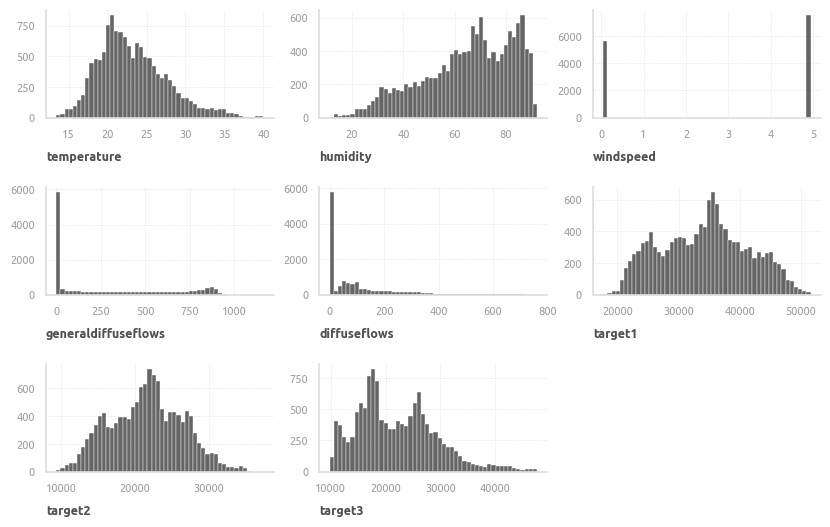

In [23]:
f = plot_gridplot(
    data=train,
    features=train.columns,
    figsize=(10,6),
    ncols=3,
    kind='hist',
    plot_shape='rectangle',
    hscale=1.6,
    histplot_kwargs={'bins': 50})

### Variables lists

In [24]:
features = [
    'temperature', 'humidity', 'windspeed',
    'generaldiffuseflows', 'diffuseflows'
]

In [25]:
months_list = ['May', 'June', 'July']

### Datetime features

In [26]:
train['minutes_fr_bgn'] = 0 + np.arange(0, len(train)) * 10

In [27]:
train['minute'] = train.index.minute

In [28]:
train['hour'] = train.index.hour

In [29]:
train['day'] = train.index.day

In [178]:
# train['day_number'] = train.index.day_of_year - train.index.day_of_year.min() + 1
train['day_of_year'] = train.index.day_of_year

In [31]:
train['weekday'] = train.index.weekday + 1

In [32]:
train['week'] = train.index.isocalendar().week

In [33]:
train['month'] = train.index.month

In [34]:
train["year_month"] = train.index.to_period('M')

In [35]:
train["year_day"] = train.index.to_period('d')

In [172]:
train.head()

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target1,target2,target3,minutes_fr_bgn,minute,...,day_number,weekday,week,month,year_month,year_day,target1_diff,target1_returns,p,target1_volatility
2017-05-01 00:00:00,19.63,59.85,0.080,0.088,0.100,29398.03279,18130.03096,19349.63563,0,0,...,1,1,18,5,2017-05,2017-05-01,NaN,NaN,NaN,NaN
2017-05-01 00:10:00,19.24,61.05,0.080,0.110,0.093,28692.98361,17728.79257,19075.62753,10,10,...,1,1,18,5,2017-05,2017-05-01,-705.04918,-2.398287,-0.023983,5.751780
2017-05-01 00:20:00,19.23,61.15,0.079,0.073,0.122,28088.65574,17171.51703,18655.87045,20,20,...,1,1,18,5,2017-05,2017-05-01,-604.32787,-2.106187,-0.021062,4.436023
2017-05-01 00:30:00,19.28,60.98,0.082,0.055,0.122,27446.55738,16892.87926,18300.24291,30,30,...,1,1,18,5,2017-05,2017-05-01,-642.09836,-2.285970,-0.022860,5.225661
2017-05-01 00:40:00,19.24,61.12,0.081,0.088,0.133,26955.54098,16235.29412,17967.93522,40,40,...,1,1,18,5,2017-05,2017-05-01,-491.01640,-1.788991,-0.017890,3.200488


In [37]:
features.extend(['hour', 'day', 'weekday'])

### Measurements frequencies check

In [38]:
# assert if daily measurements frequencies not equals
assert (train.groupby('day_number').size().sort_values().min() ==
        train.groupby('day_number').size().sort_values().max())

### Target Variable

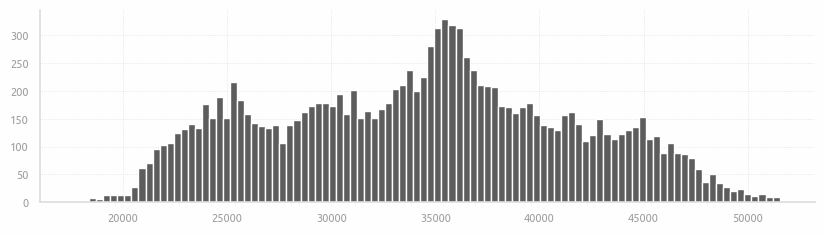

In [39]:
plt.hist(train['target1'], bins=100);

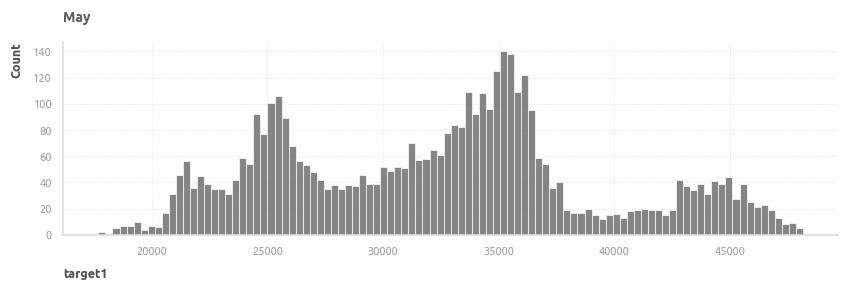

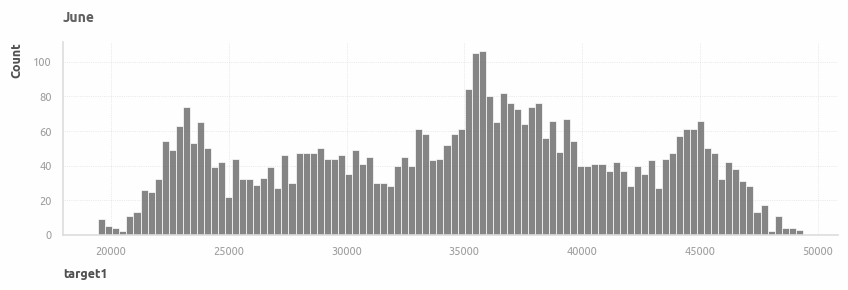

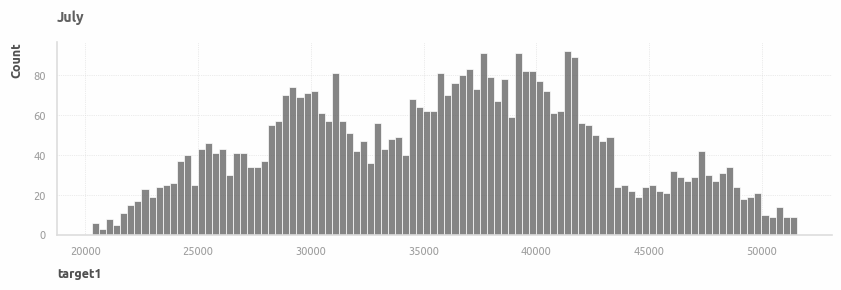

In [40]:
for i, m in zip(train['month'].unique(), months_list):
    sns.histplot(
        data=train[train['month']==i],
        x='target1',
        bins=100);
    plt.title(m)
    plt.show()

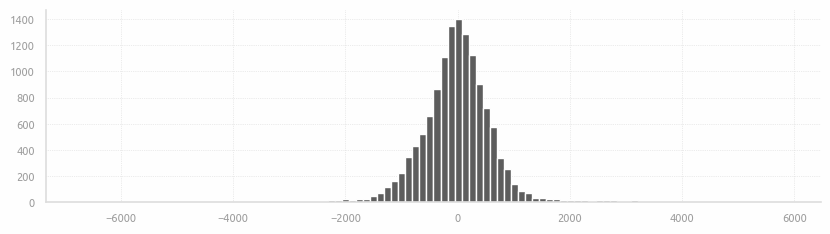

In [41]:
plt.hist(train['target1'].diff(), bins=100);

## Naive Model

##### Predictions

In [42]:
y_pred_naive = train['target1'].shift(1).copy()

##### MAE

In [43]:
mean_absolute_error(train['target1'][1:], y_pred_naive[1:])

458.95249726277655

##### MAPE

In [44]:
mean_absolute_percentage_error(train['target1'][1:], y_pred_naive[1:]) * 100

1.3755373863600664

##### RMSE

In [45]:
root_mean_squared_log_error(train['target1'][1:], y_pred_naive[1:])

0.01934095552676777

## Discretization and Visualization

#### Weeks

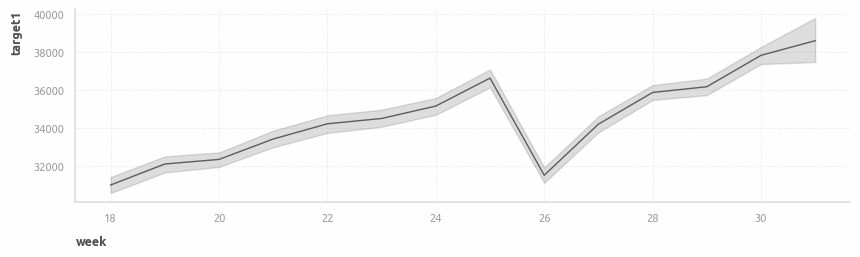

In [46]:
sns.lineplot(
    x=train['week'],
    y=train['target1'],
    errorbar=('ci')
);

#### Weekdays

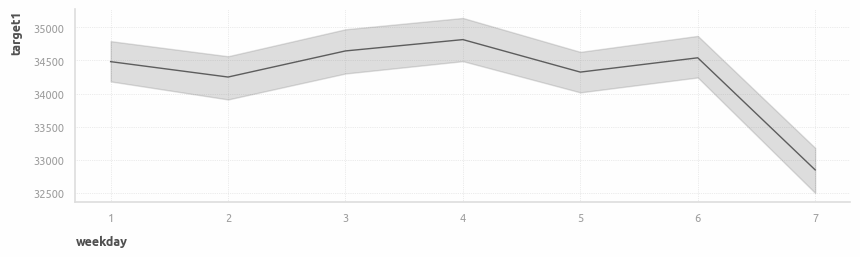

In [47]:
sns.lineplot(
    x=train['weekday'],
    y=train['target1']
);

In [48]:
weekdays = np.sort(train['weekday'].unique())

In [49]:
ncols = 2
nrows = math.ceil(len(weekdays)/ncols)

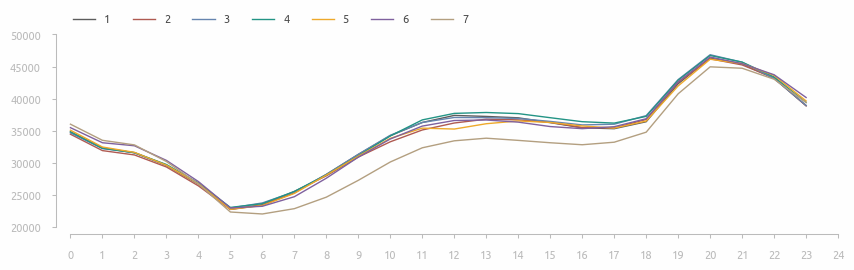

In [50]:
fig = plt.figure()
for i, j in enumerate(weekdays):
    plt.plot(
        train[train['weekday']==j].groupby('hour').mean().index,
        train[train['weekday']==j].groupby('hour').mean()['target1'],
        color=palette[i],
        lw=1,
        label=j
    )
plt.legend(**legend_inline())
axis_rstyle(x_ticks=[0, 24, 1])

#### Days

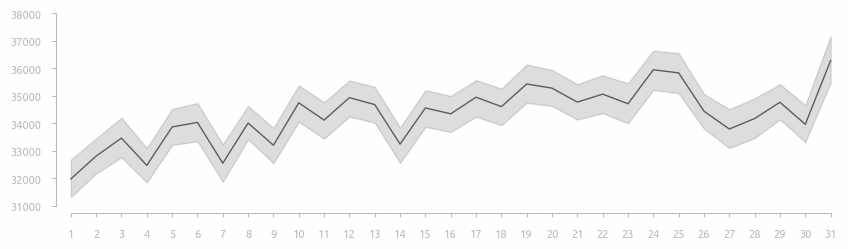

In [51]:
sns.lineplot(
    x=train['day'],
    y=train['target1'],
    )
plt.xticks(train.groupby('day').mean().index)
plt.xlabel(None)
plt.ylabel(None)
axis_rstyle()

plt.show()

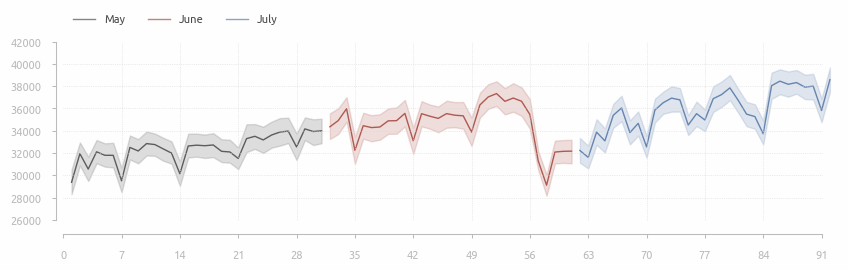

In [52]:
fig = plt.figure(figsize=(10, 2.5))

sns.lineplot(
    data=train,
    x=train['day_number'],
    y='target1',
    hue='month',
    palette=[palette[0], palette[1], palette[2]],
)
plt.xlim(0, 93)
plt.xlabel(None)
plt.ylabel(None)

handle_may = Line2D(
    [], [], label='May', lw=1, color=palette[0], alpha=0.75)
handle_june = Line2D(
    [], [], label='June', lw=1, color=palette[1], alpha=0.75)
handle_july = Line2D(
    [], [], label='July', lw=1, color=palette[2], alpha=0.75)

plt.legend(handles=[handle_may, handle_june, handle_july], **legend_inline())
axis_rstyle(x_ticks=[0, 92, 7], x_lim=[0, 93], grid=True)
plt.show()

#### Daily

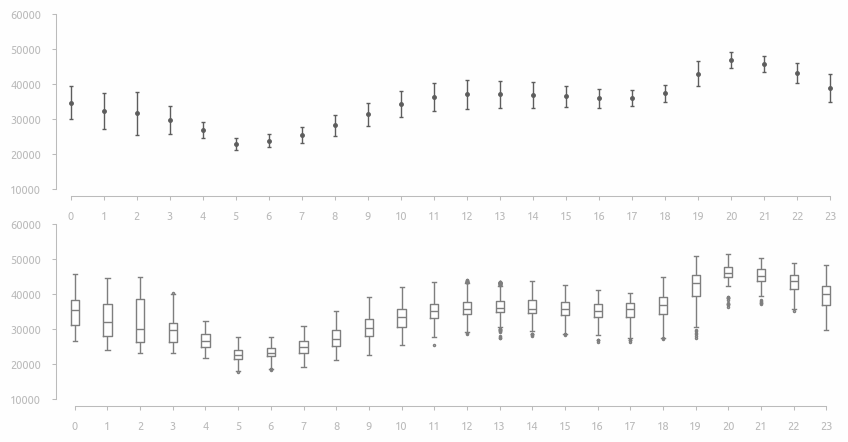

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5))

ax[0].errorbar(
    range(len(train[train['weekday']==j].groupby('hour').mean())),
    train[train['weekday']==3].groupby('hour').mean()['target1'],
    train[train['weekday']==3].groupby('hour')['target1'].std(),
    ls='none',
    marker='o',
    markersize=2.5,
    lw=1,
    capsize=1.5
);
axis_rstyle(
    ax=ax[0], x_ticks=[0, 23, 1], y_ticks=[10000, 60000, 10000],
    margin=True)
ax[0].set_ylim(10000, 60000)

sns.boxplot(
    y=train['target1'],
    x=train['hour'],
    width=0.25,
    fill=False,
    linewidth=1,
    color=palette[-3],
    flierprops=dict(markersize=1.5),
    ax=ax[1]
)
axis_rstyle(
    ax=ax[1], x_ticks=[0, 23, 1], y_ticks=[10000, 60000, 10000],
    margin=True)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_ylim(10000, 60000)

plt.show()

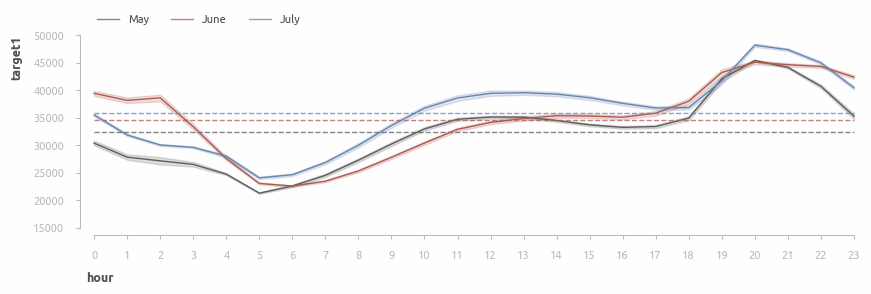

In [54]:
fig = plt.figure()
for i in arange(5,7, True):
    sns.lineplot(
        x=train.loc[f'2017-{str(i).zfill(2)}']['hour'],
        y=train.loc[f'2017-{str(i).zfill(2)}']['target1'],
        color=palette[i-5],
        label=i
    )
    plt.axhline(
        train.loc[f'2017-{str(i).zfill(2)}']['target1'].mean(),
        0.01, 0.99, lw=1, ls='--', alpha=0.75, color=palette[i-5])
plt.xticks(range(24))

handle_may = Line2D(
    [], [], label='May', lw=1, color=palette[0], alpha=0.75)
handle_june = Line2D(
    [], [], label='June', lw=1, color=palette[1], alpha=0.75)
handle_july = Line2D(
    [], [], label='July', lw=1, color=palette[2], alpha=0.75)
plt.legend(handles=[handle_may, handle_june, handle_july], **legend_inline())

axis_rstyle()

plt.show()

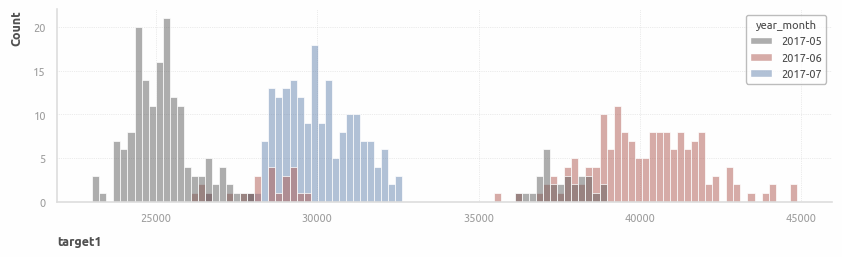

In [55]:
sns.histplot(
    x=train[train['hour']==2]['target1'],
    hue=train[train['hour']==2]['year_month'],
    bins=100
)
plt.show()

## Stationarity

p< 0.05: Enough evidence to say, that process is stationarity

In [56]:
# NULL: non-stationarity
sm.tsa.stattools.adfuller(train['target1'])

(-18.64310154659073,
 2.0533721672979806e-30,
 41,
 13206,
 {'1%': -3.4308452727203065,
  '5%': -2.861758886933321,
  '10%': -2.5668865086102035},
 199179.14191467778)

## Trend and Seasonality

In [57]:
stl_day = statsmodels.tsa.seasonal.STL(train.resample('d').mean()['target1']).fit()

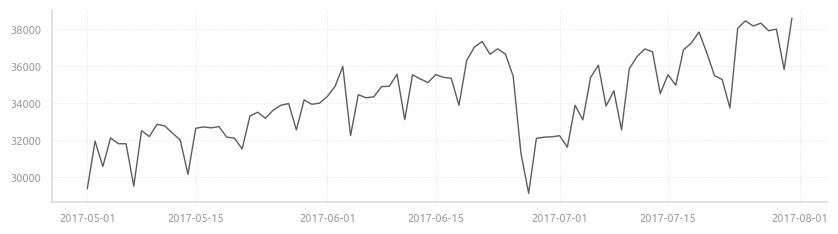

In [58]:
plt.plot(stl_day.observed);

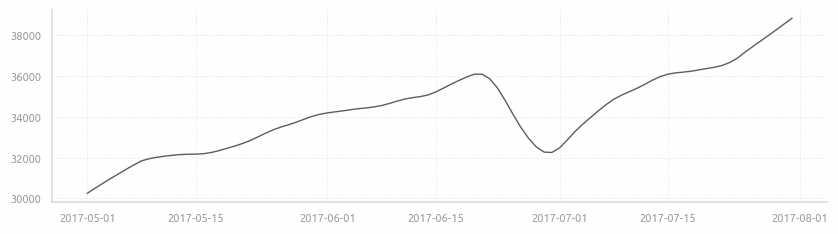

In [59]:
plt.plot(stl_day.trend);

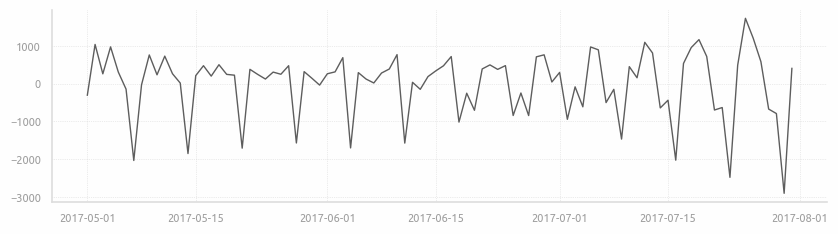

In [60]:
plt.plot(stl_day.seasonal);

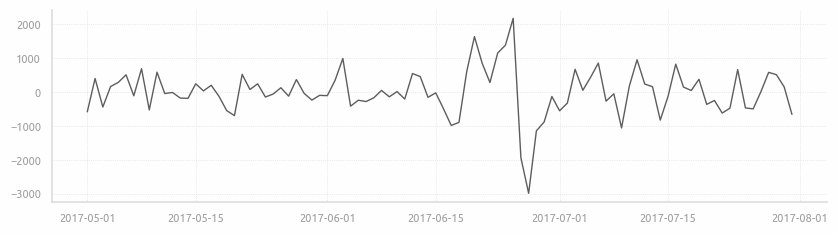

In [61]:
plt.plot(stl_day.resid);

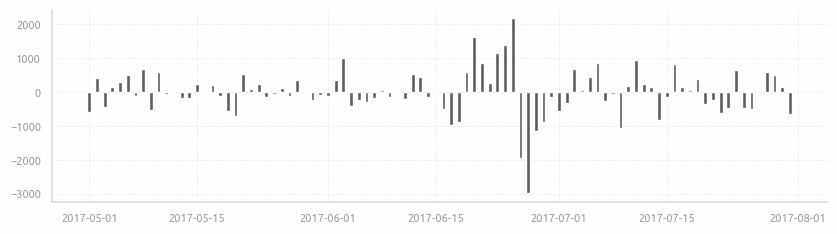

In [62]:
plt.bar(x=train.resample('D').mean().index, height=stl_day.resid, width=0.5);

#### Detrending

##### Differencing

In [63]:
train['target1_diff'] = train['target1'].diff().copy()

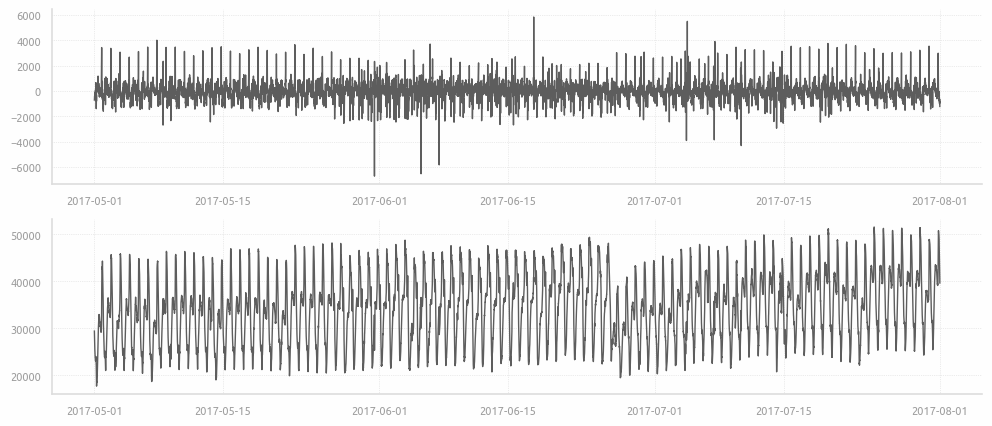

In [145]:
fig = plt.figure(figsize=(12, 5))

plt.subplot(2,1,1)
plt.plot(
    train.index,
    train['target1_diff']
);
plt.subplot(2,1,2)
plt.plot(
    train.index,
    train['target1']
);

##### Returns

In [65]:
train['target1_returns'] = train['target1'].pct_change(1).mul(100)

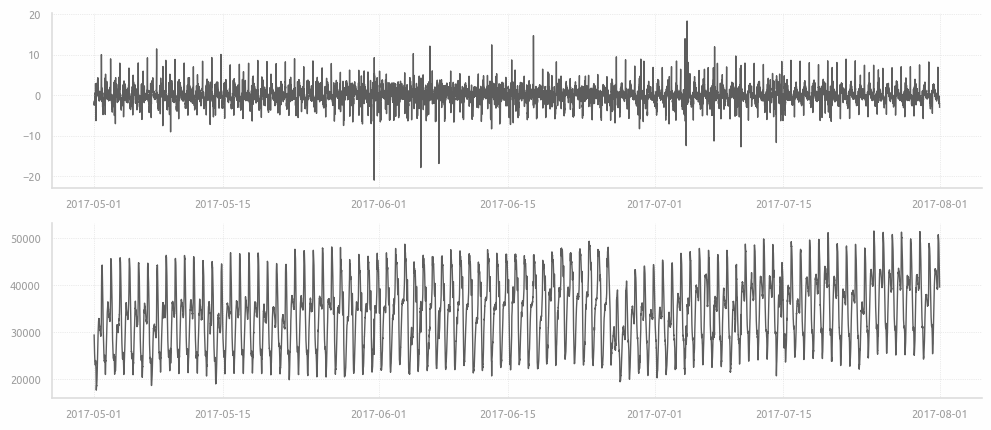

In [144]:
fig = plt.figure(figsize=(12, 5))

plt.subplot(2,1,1)
plt.plot(
    train.index,
    train['target1_returns']
);
plt.subplot(2,1,2)
plt.plot(
    train.index,
    train['target1']
);

##### Volatility

In [140]:
train['target1_volatility'] = (train['target1_returns']**2).copy()

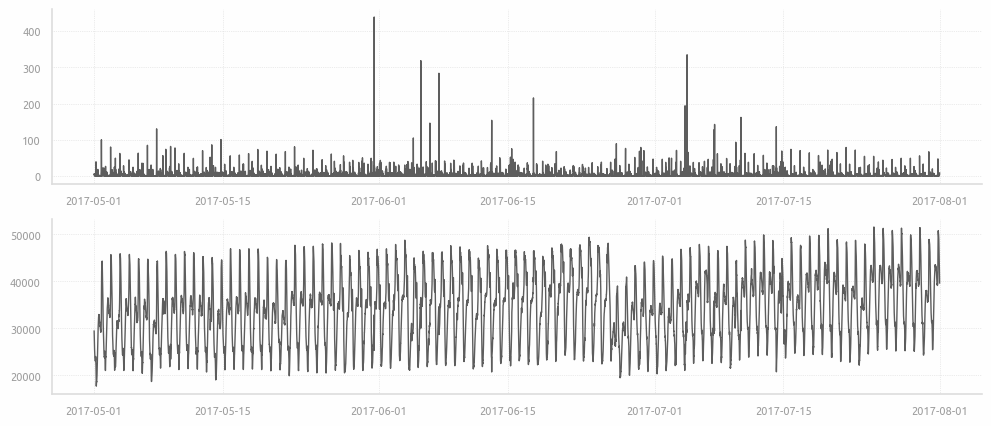

In [170]:
fig = plt.figure(figsize=(12, 5))

plt.subplot(2,1,1)
plt.plot(
    train.index,
    train['target1_volatility']
);
plt.subplot(2,1,2)
plt.plot(
    train.index,
    train['target1']
);

##### Anomaly Example

index: 2017-05-31 11:30:00  
volatility: 438.955206

In [147]:
train['target1_volatility'].sort_values()

2017-07-03 15:20:00      0.000000
2017-05-02 14:10:00      0.000000
2017-05-14 15:20:00      0.000000
2017-07-15 17:30:00      0.000000
2017-05-09 13:00:00      0.000000
                          ...    
2017-06-07 12:30:00    283.734758
2017-06-05 13:10:00    318.611321
2017-07-04 12:30:00    334.726302
2017-05-31 11:30:00    438.955206
2017-05-01 00:00:00           NaN
Name: target1_volatility, Length: 13248, dtype: float64

In [152]:
train.loc['2017-05-31 11:15':'2017-05-31 11:55']

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target1,target2,target3,minutes_fr_bgn,minute,...,day_number,weekday,week,month,year_month,year_day,target1_diff,target1_returns,p,target1_volatility
2017-05-31 11:20:00,23.94,62.07,4.928,817.0,91.3,32029.37705,20504.02477,15391.09312,43880,20,...,31,3,22,5,2017-05,2017-05-31,-805.77049,-2.453988,-0.024540,6.022056
2017-05-31 11:30:00,24.26,60.61,4.919,830.0,86.3,25318.81967,20574.61300,15618.46154,43890,30,...,31,3,22,5,2017-05,2017-05-31,-6710.55738,-20.951258,-0.209513,438.955206
2017-05-31 11:40:00,24.42,60.71,4.923,846.0,84.3,27660.59016,20689.78328,15863.31984,43900,40,...,31,3,22,5,2017-05,2017-05-31,2341.77049,9.249130,0.092491,85.546402
2017-05-31 11:50:00,24.77,58.61,4.922,854.0,83.5,28957.37705,20760.37152,15845.82996,43910,50,...,31,3,22,5,2017-05,2017-05-31,1296.78689,4.688211,0.046882,21.979324


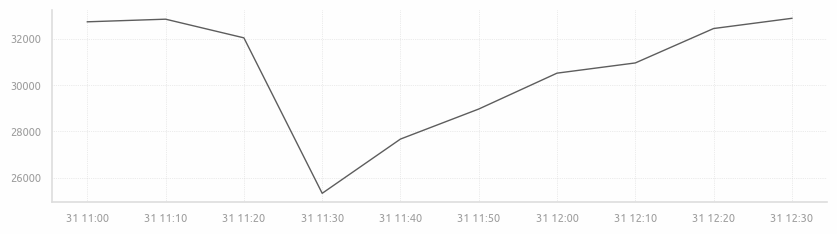

In [163]:
plt.plot(
    train.loc['2017-05-31 11:00':'2017-05-31 12:30'].index,
    train.loc['2017-05-31 11:00':'2017-05-31 12:30']['target1']
);

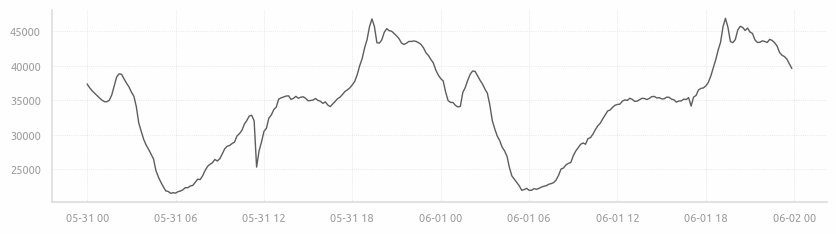

In [164]:
plt.plot(
    train.loc['2017-05-31':'2017-06-01'].index,
    train.loc['2017-05-31':'2017-06-01']['target1']
);

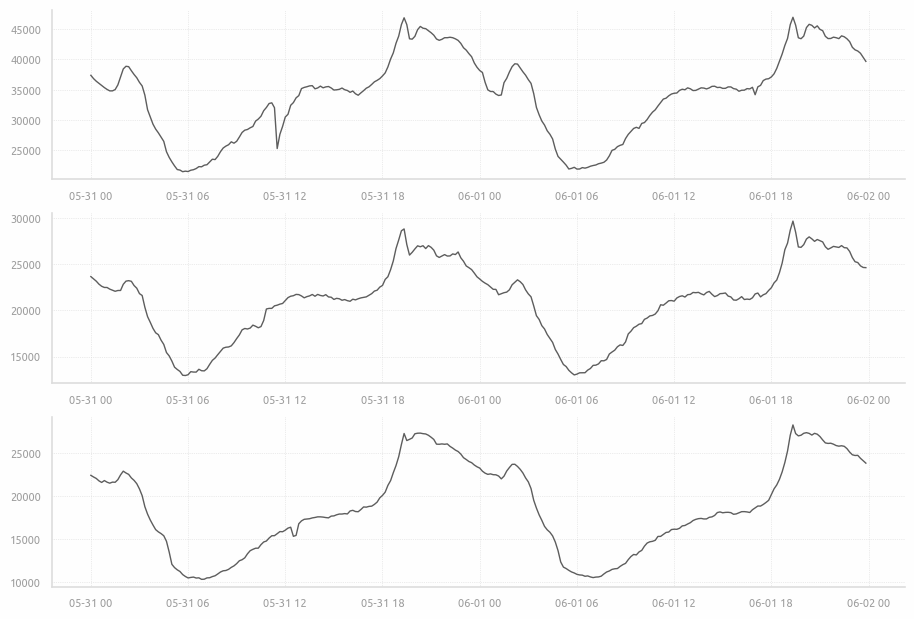

In [165]:
fig, ax = plt.subplots(3,1, figsize=(11, 7.5))

for i, v in enumerate(['target1', 'target2', 'target3']):
    ax[i].plot(
        train.loc['2017-05-31':'2017-06-01'].index,
        train.loc['2017-05-31':'2017-06-01'][v]
    );

## Autocorrelation

#### ACF - 40 period

In [67]:
acf_result40 = statsmodels.tsa.stattools.acf(
    train['target1'],
    adjusted=False, nlags=40, qstat=False, fft=True,
    alpha=0.05, bartlett_confint=True, missing='none')

In [68]:
acf40 = acf_result40[0][1:]
alpha40 = acf_result40[1][1:]

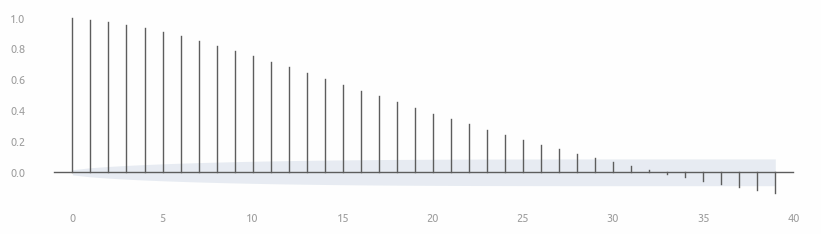

In [138]:
plot_acf(acf40, alpha40)

In [70]:
ts_acf_last_significant_index(alpha40)

29

#### ACF - 300 period

In [71]:
acf_result300 = statsmodels.tsa.stattools.acf(
    train['target1'],
    adjusted=False, nlags=300, qstat=False, fft=True,
    alpha=0.05, bartlett_confint=True, missing='none')

In [72]:
acf300 = acf_result300[0][1:]
alpha300 = acf_result300[1][1:]

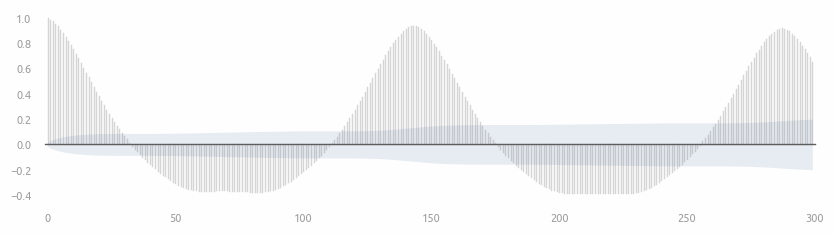

In [137]:
plot_acf(acf300, alpha300, transparency_lines=0.25)

#### PACF - 40 period

In [74]:
pacf40_result = statsmodels.tsa.stattools.pacf(
    train['target1'], nlags=40, method='ywadjusted', alpha=0.05)

In [75]:
pacf40 = pacf40_result[0][1:]
palpha40 = pacf40_result[1][1:]

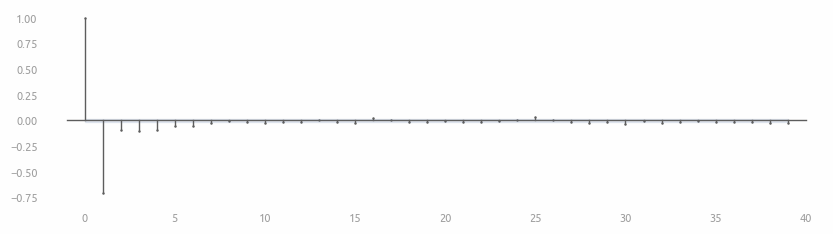

In [127]:
plot_acf(pacf40, palpha40, scatter=True)

In [77]:
# calculate index of last significant element in PACF
ts_acf_last_significant_index(palpha40)

7

### Scatterplots Matrix

No non-linear relationships

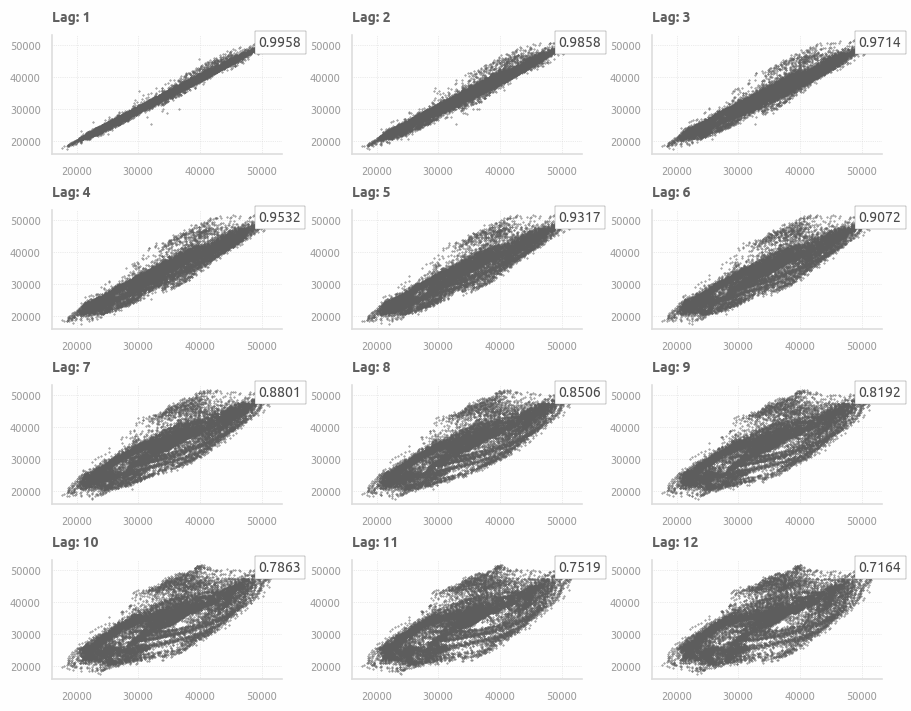

In [78]:
ts_scatterplot_matrix(
    train['target1'],
    lags=12, ncols=3, s=0.5, figsize=(9, 7))

In [207]:
scipy.stats.pearsonr(
    train['target1_diff'][2:],
    train['target1_diff'].shift(1)[2:]
)

PearsonRResult(statistic=0.6996583402349168, pvalue=0.0)

In [203]:
scipy.stats.pearsonr(
    train['target1_returns'][2:],
    train['target1_returns'].shift(1)[2:]
)

PearsonRResult(statistic=0.6893332295420376, pvalue=0.0)

In [208]:
scipy.stats.pearsonr(
    train['target1_volatility'][2:],
    train['target1_volatility'].shift(1)[2:]
)

PearsonRResult(statistic=0.3096654205596545, pvalue=2.7446567520323404e-292)

#### Predictors

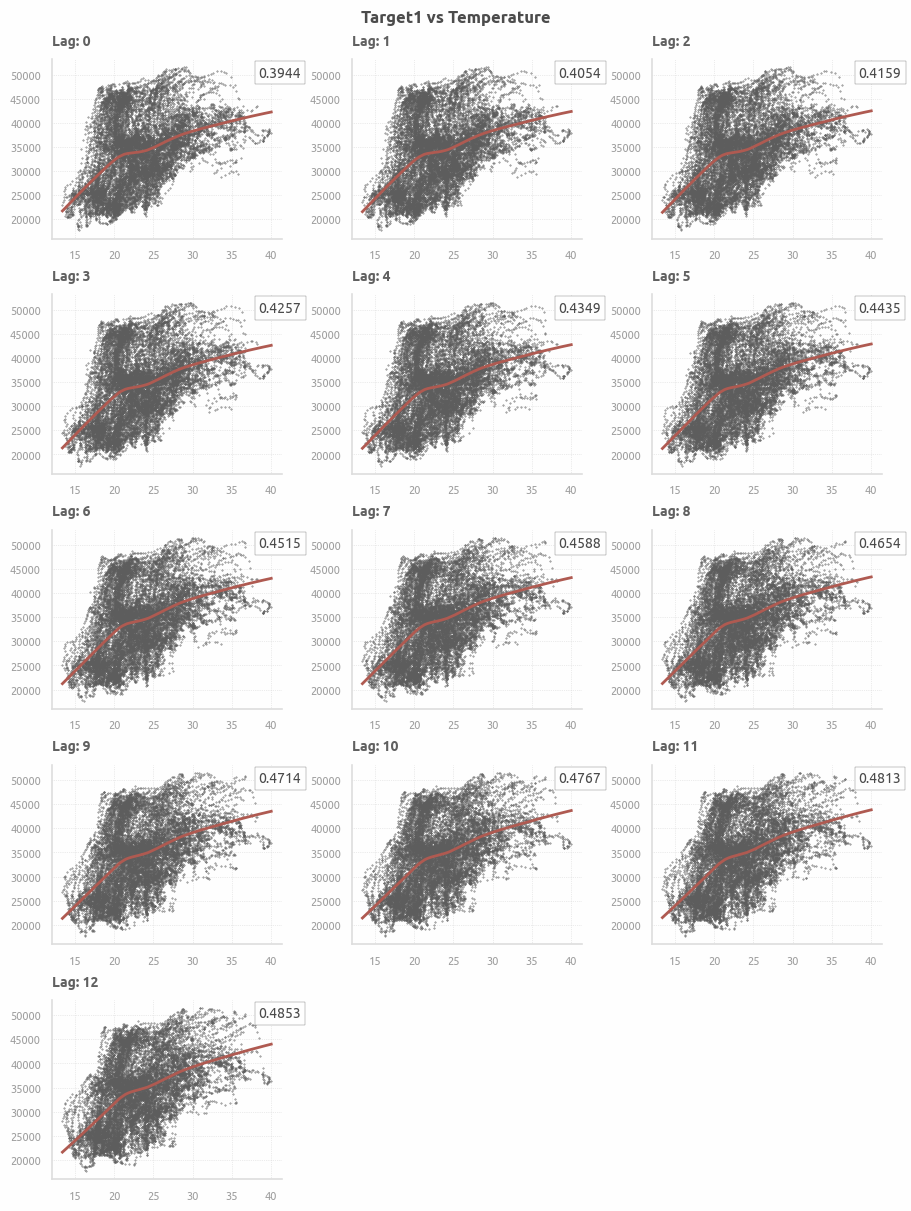

In [79]:
ts_scatterplot_matrix(
    x=train['temperature'], y=train['target1'],
    figtitle='Target1 vs Temperature', lowess=True,
    lags=12, ncols=3, s=0.5, figsize=(9, 12), constrained_layout=True)

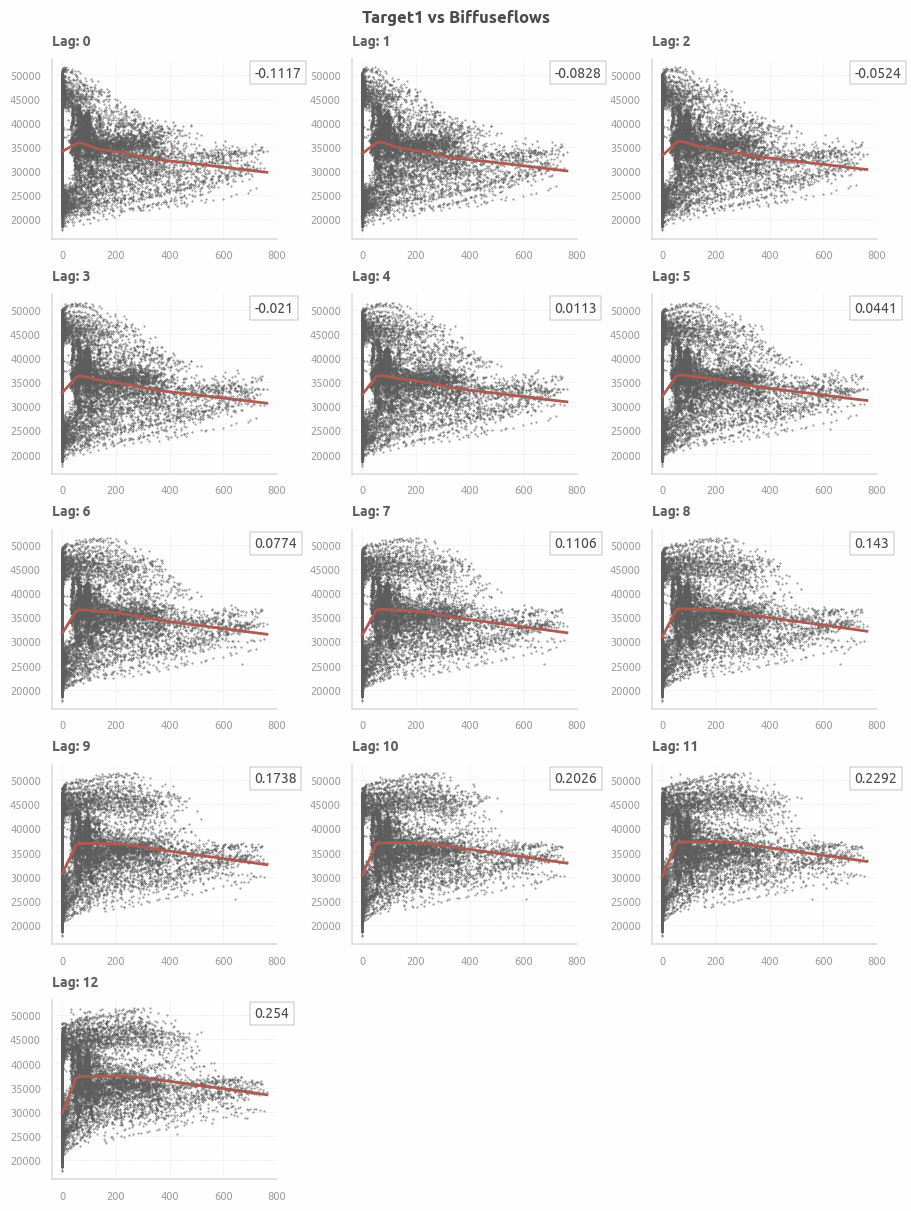

In [80]:
ts_scatterplot_matrix(
    x=train['diffuseflows'], y=train['target1'],
    figtitle='Target1 vs Вiffuseflows', lowess=True,
    lags=12, ncols=3, s=0.5, figsize=(9, 12), constrained_layout=True)

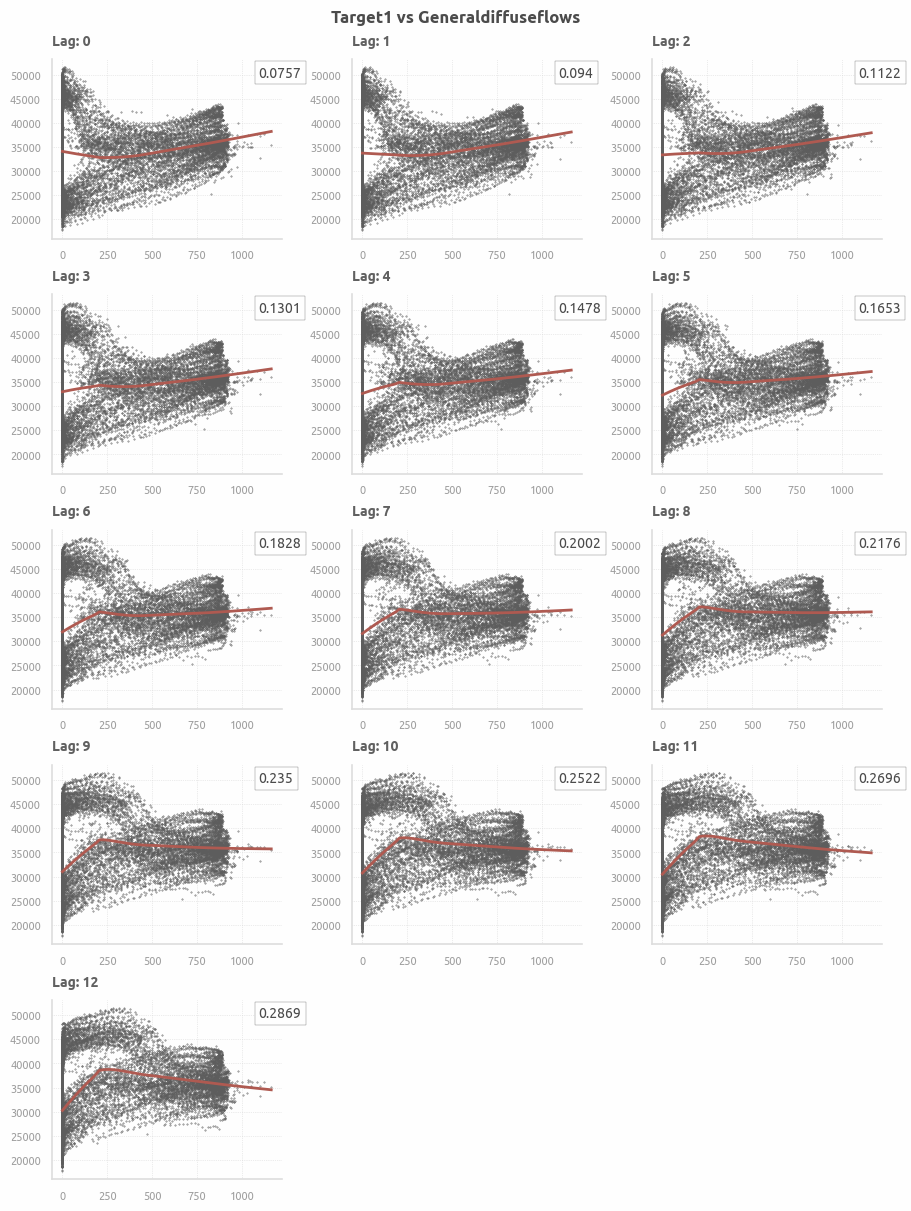

In [81]:
ts_scatterplot_matrix(
    x=train['generaldiffuseflows'], y=train['target1'],
    figtitle='Target1 vs Generaldiffuseflows', lowess=True,
    lags=12, ncols=3, s=0.5, figsize=(9, 12), constrained_layout=True)

### P

xt = (1 + pt)xt−1

In [82]:
train['p'] = train['target1'] / train['target1'].shift(1) - 1

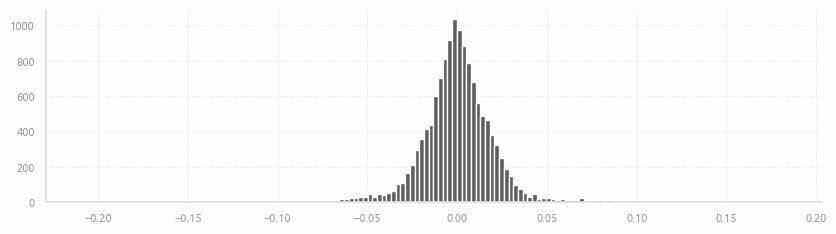

In [83]:
plt.hist(train['p'], bins=150);

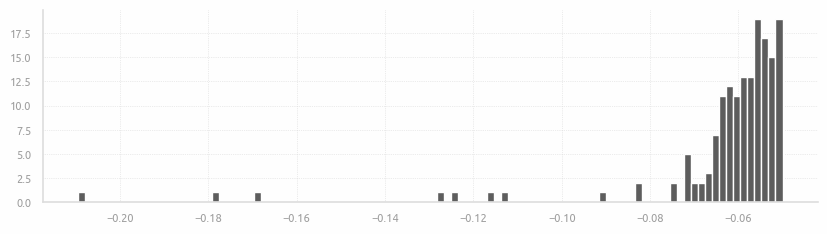

In [84]:
plt.hist(train.loc[train['p']<-0.05, 'p'], bins=100);

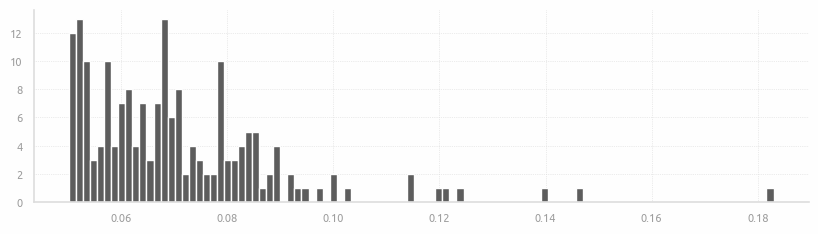

In [85]:
plt.hist(train.loc[train['p']>0.05, 'p'], bins=100);

### Save Session

### Execution time

In [86]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 0:02:44
